In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [31]:
file_path = '/content/SAMSUNG.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [32]:
df

,Close,Open,High,Low
Date,,,,
2019-03-01,64592.45648,64636.91167,65094.842037,64135.009671
2019-03-02,64592.45648,64636.91167,65094.842037,64135.009671
2019-03-03,64592.45648,64636.91167,65094.842037,64135.009671
2019-03-04,44850.00000,46000.00000,46100.000000,44800.000000
2019-03-05,44250.00000,44600.00000,45100.000000,44150.000000
...,...,...,...,...
2024-05-28,77600.00000,76500.00000,78000.000000,76200.000000
2024-05-29,75200.00000,77700.00000,78200.000000,75200.000000
2024-05-30,73500.00000,74800.00000,75200.000000,73500.000000


In [33]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -1.8115700839407085
p-value: 0.37473278607160987
Critical Values:
   1%: -3.4338036790464495
   5%: -2.8630656035129878
   10%: -2.5675821738080615
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -1.7905807556426965
p-value: 0.3851480126760309
Critical Values:
   1%: -3.4338036790464495
   5%: -2.8630656035129878
   10%: -2.5675821738080615
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -1.7911523686914972
p-value: 0.3848630600156162
Critical Values:
   1%: -3.4338036790464495
   5%: -2.8630656035129878
   10%: -2.5675821738080615
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -1.8084468001892724
p-value: 0.376276229049448
Critical Values:
   1%: -3.4338036790464495
   5%: -2.8630656035129878
   10%: -2.5675821738080615
==> Không phải chuỗi dừng



In [34]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 6:4
train, test = train_test_split(df, test_size=0.4, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [35]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -8.859132315158803
p-value: 1.4994348745777902e-14
Critical Values:
   1%: -3.436155341313321
   5%: -2.8641034026875123
   10%: -2.568134825546958
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -8.860444971653214
p-value: 1.4878752403862606e-14
Critical Values:
   1%: -3.436155341313321
   5%: -2.8641034026875123
   10%: -2.568134825546958
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -8.804139614230088
p-value: 2.0737096688488696e-14
Critical Values:
   1%: -3.436155341313321
   5%: -2.8641034026875123
   10%: -2.568134825546958
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -8.872585706217725
p-value: 1.3850980691724328e-14
Critical Values:
   1%: -3.436155341313321
   5%: -2.8641034026875123
   10%: -2.568134825546958
==> Là chuỗi dừng



In [36]:
!pip install pmdarima

In [37]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Cột : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=5, max_q=5, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'bậc tối ưu cho cột:{column} là: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Cột : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=23321.924, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23853.039, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=23691.931, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23314.548, Time=0.48 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=23293.946, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=23219.256, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=23220.675, Time=7.66 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=23285.240, Time=2.30 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=23281.837, Time=2.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=23308.131, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=23153.410, Time=5.57 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=23198.564, Time=2.69 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=23208.566, Time=4.41 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=23279.900, Time=1.61 sec
 ARIMA(

In [38]:

model = VARMAX(train_diff, order=(5, 2))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                 1151
Model:                                   VARMA(5,2)   Log Likelihood              -37318.563
                                        + intercept   AIC                          74889.127
Date:                              Sat, 08 Jun 2024   BIC                          75525.224
Time:                                      08:18:51   HQIC                         75129.232
Sample:                                  03-02-2019                                         
                                       - 04-25-2022                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     30.67, 1.22, 0.14, 0.01   Jarque-Bera (JB):   76.03, 2077.29, 9760.80, 1126.66
Prob(Q):                 0.00, 0.27, 0.71, 0.92   Prob(JB): 

In [39]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

In [40]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2022-04-26,789.463024,762.542406,758.322170,767.916882
2022-04-27,-137.056522,-25.421983,-129.042975,-40.171850
2022-04-28,-513.898632,-545.506020,-503.009244,-531.836563
2022-04-29,-641.512313,-634.914420,-680.718388,-575.419799
2022-04-30,-132.640485,-133.505737,-161.219877,-122.281892
...,...,...,...,...
2024-05-28,2.073304,2.496619,1.932112,2.732081
2024-05-29,2.073304,2.496619,1.932112,2.732081
2024-05-30,2.073304,2.496619,1.932112,2.732081


In [41]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data.loc[index] = current_values

In [42]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)
r2 = r2_score(test, predicts_date)

print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

results_GBM = pd.DataFrame([['Gradient Boosting', mape, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_GBM

MAPE: 1.0000
RMSE: 66591.6833
MSE: 4434452286.0418
R²: -113.9336


,Model,MAE,MSE,RMSE,R2 Score
0,Gradient Boosting,0.999966,4.434452e+09,66591.68331,-113.933568


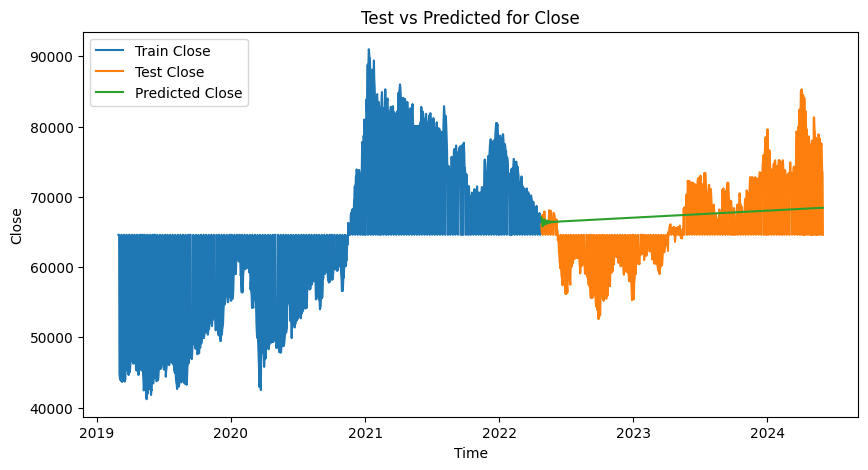

In [43]:
# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

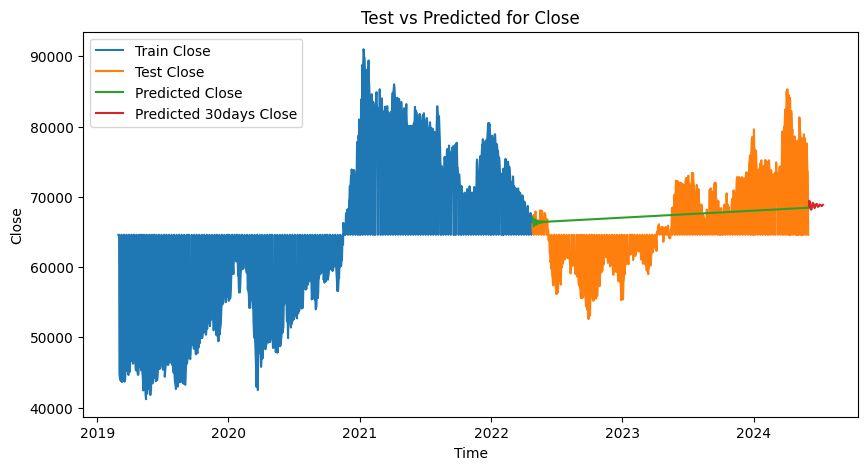

In [44]:

last_original_values_afterPredict = forecast_data.iloc[len(forecast_data) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_30days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 30 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
future_predict = results.get_forecast(steps=30)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_30days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_30days.index, forecast_data_30days[col], label=f'Predicted 30days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

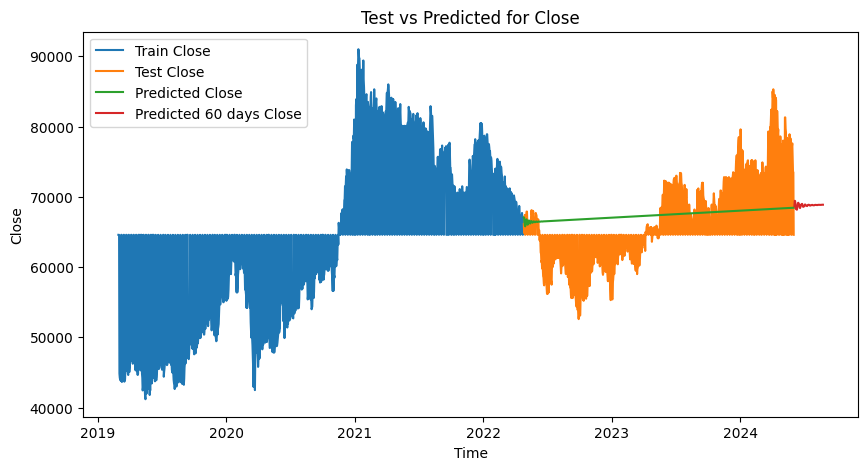

In [45]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_60days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 60 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=60, freq='B')
future_predict = results.get_forecast(steps=60)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_60days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_60days.index, forecast_data_60days[col], label=f'Predicted 60 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

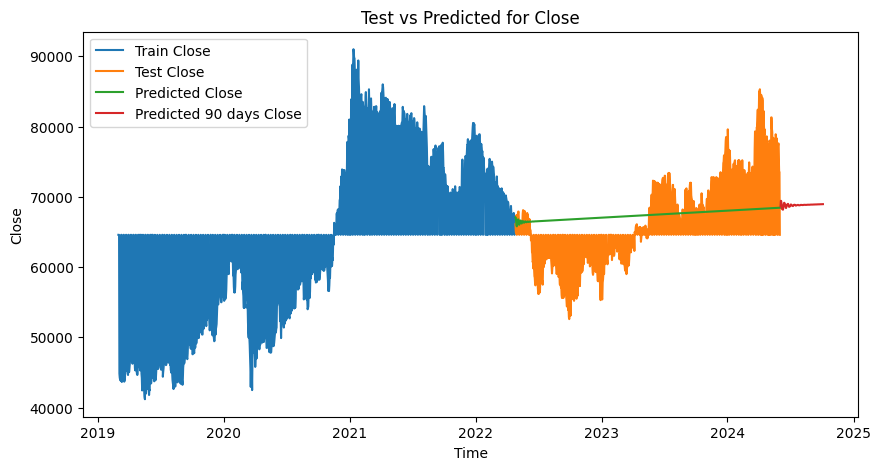

In [46]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_90days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 90 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=90, freq='B')
future_predict = results.get_forecast(steps=90)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_90days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_90days.index, forecast_data_90days[col], label=f'Predicted 90 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()